<h1><center> UFU - Universidade Federal de Uberlândia</center></h1>

<h2><center>Graduação em Engenharia Civil</center></h2>

<h3><center>INICIAÇÃO CIENTÍFICA</center><br>
TÍTULO: DESENVOLVIMENTO DE MODELOS DE PREVISÃO DE CHUVAS USANDO
APRENDIZADO DE MÁQUINA <br>
<br>
ALUNO: Pedro Augusto Toledo Rios</h3>

<p>Este notebook é referente à Iniciação Ciêntífica na área de Ciência da Computação/Ánalise de Dados .</p>

# Classificação 

### Período de Treino (1980 - 1989) // Período de Teste ( 1990 - 1999)

## Importações e Configurações Iniciais

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sn

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import  metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import ConfusionMatrixDisplay
import xgboost as xgb
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Análise Exploratória dos Dados

In [2]:
#Tratamento de dados
missing_values = ['n/a','na','*****','*','*******',' -', '******', '5..84', '3..66', '3.3.21', '1..41', '********', '3.7.94', '354.59*', '564..79', '5.04.24', '21:36','**********', '***', '*********', '03:18', '00:00', '03:48', '08:42', '03:06', '09:06', '01:30', '07:48', '09:12', '10:18', '01:24', '#VALUE!' , '926,4923,8', '27/07/1902**21:36:00', '-','*****','185.488.992']

dados_clima = pd.read_csv("C:/Users/riospedro/OneDrive - Universidade Federal de Uberlândia/Área de Trabalho/python 05-11/Titanic/modelo global/Classificação/dadosclima_PERIODOSECO - Copia.csv", header = None, sep=';', na_values=missing_values)
dados_clima.columns=['Temp Máx (°C)', 'Temp Mín (°C)', 'Temp Média (°C)', 'Velocidade do Vento (km/h)', 'Radiação solar (cal/cm²/h)', 'Pressão (mb)', 'UR (%)', 'Chuva (mm)', 'Mês', 'Ano', 'Chuvoso/Seco']
dados_clima['Pressão (mb)'] = dados_clima['Pressão (mb)'].str.replace(',,', '.')
dados_clima['UR (%)'] = dados_clima['UR (%)'].astype(float)
dados_clima['Pressão (mb)'] = dados_clima['Pressão (mb)'].astype(float)
dados_clima['Ano'] = dados_clima['Ano'].str.replace(',,', '')
dados_clima['Ano'] = dados_clima['Ano'].astype(int)



combine = [dados_clima]
chuva = dados_clima['Chuva (mm)']

#Primeiras cinco linhas dos dados pós-tratados
dados_clima.head()
dados_clima.dropna()

#Número de missing values encontrdos em cada coluna
print(dados_clima.isnull().sum())

Temp Máx (°C)                    8
Temp Mín (°C)                    8
Temp Média (°C)                  7
Velocidade do Vento (km/h)     220
Radiação solar (cal/cm²/h)     252
Pressão (mb)                   194
UR (%)                        2292
Chuva (mm)                      93
Mês                              0
Ano                              0
Chuvoso/Seco                     0
dtype: int64


In [3]:
dados_clima.describe()

,Temp Máx (°C),Temp Mín (°C),Temp Média (°C),Velocidade do Vento (km/h),Radiação solar (cal/cm²/h),Pressão (mb),UR (%),Chuva (mm),Mês,Ano,Chuvoso/Seco
count,6580.000000,6580.000000,6581.000000,6368.000000,6336.000000,6394.000000,4296.000000,6495.000000,6588.000000,6588.000000,6588.0
mean,26.660957,12.124316,19.401292,2.982269,323.018679,930.241164,68.829586,1.135625,6.502732,2001.500000,0.0
std,3.828162,4.140720,3.477901,2.677097,96.995011,131.833751,16.570284,3.944141,1.701541,10.389083,0.0
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1984.000000,0.0
25%,24.600000,9.400000,17.300000,1.390000,268.180000,930.400000,62.275000,0.000000,5.000000,1992.750000,0.0
50%,27.000000,12.000000,19.400000,2.320000,326.970000,935.100000,71.750000,0.000000,7.000000,2001.500000,0.0
75%,29.200000,15.000000,21.800000,3.780000,384.650000,939.100000,79.300000,0.000000,8.000000,2010.250000,0.0
max,38.800000,27.600000,31.400000,99.200000,816.740000,9923.700000,99.900000,28.600000,9.000000,2019.000000,0.0


In [5]:
#dados_clima['Choveu?']= chuva

# Loop que preenche a nova coluna com 0(não choveu) e 1(choveu)
for dados_clima in combine:    
    dados_clima.loc[ dados_clima['Chuva (mm)'] == 0, 'Choveu?'] = 0
    dados_clima.loc[(dados_clima['Chuva (mm)'] > 0), 'Choveu?'] = 1

#Visualização das primeiras cinco linhas da tabela
dados_clima.head()   
    

,Temp Máx (°C),Temp Mín (°C),Temp Média (°C),Velocidade do Vento (km/h),Radiação solar (cal/cm²/h),Pressão (mb),UR (%),Chuva (mm),Mês,Ano,Chuvoso/Seco,Choveu?
0,24.2,13.8,19.0,3.08,386.44,937.7,94.8,5.4,4,1984,0,1.0
1,27.6,17.4,22.5,3.61,287.35,929.6,90.2,0.0,4,1984,0,0.0
2,27.2,19.4,23.3,2.98,158.59,929.5,96.6,0.0,4,1984,0,0.0
3,24.8,17.8,21.3,2.20,168.45,929.3,NaN,0.0,4,1984,0,0.0
4,21.0,12.0,16.5,1.40,455.80,932.0,96.3,0.0,4,1984,0,0.0


In [6]:
#Tratar os Missing Values (Valores Ausentes)
dados_clima['UR (%)'].dropna()
dados_clima['UR (%)'] = dados_clima['UR (%)'].astype(float)
dados_clima['UR (%)'] = dados_clima['Radiação solar (cal/cm²/h)'].astype(float)
dados_clima['Temp Mín (°C)'].fillna(method='ffill',inplace = True)   #ffill => preencher com a última temperatura antes do Missing Value
dados_clima['Temp Média (°C)'].fillna(method='ffill',inplace = True) #ffill => preencher com a última temperatura antes do Missing Value
dados_clima['Velocidade do Vento (km/h)'].fillna(method='ffill',inplace = True) #ffill => preencher com a última velocidade antes do Missing Value
dados_clima['Radiação solar (cal/cm²/h)'].fillna(method='ffill',inplace = True) #ffill => preencher com a última radiação antes do Missing Value
dados_clima['UR (%)'].fillna(method='ffill',inplace = True) #ffill => preencher com a última taxa UR antes do Missing Value
dados_clima['Chuva (mm)'].fillna(method='ffill',inplace = True) #ffill => preencher com a última quantidade antes do Missing Value
dados_clima['Pressão (mb)'].fillna(method='ffill',inplace = True) #ffill => preencher com a última pressão antes do Missing Value
dados_clima['Choveu?'].fillna(method='ffill',inplace = True) #ffill => preencher com a última pressão antes do Missing Value
dados_clima['Temp Máx (°C)'].fillna(method='ffill',inplace = True)   #ffill => preencher com a última temperatura antes do Missing Value
dados_clima['Choveu?'] = dados_clima['Choveu?'].dropna()
dados_clima['Choveu?'] = dados_clima['Choveu?'].dropna()



#verificar os missing values após a imputação acima
print('\nMissing Values no dataframe  após o tratamento:\n',dados_clima.isnull().sum(), sep="")


Missing Values no dataframe  após o tratamento:
Temp Máx (°C)                 0
Temp Mín (°C)                 0
Temp Média (°C)               0
Velocidade do Vento (km/h)    0
Radiação solar (cal/cm²/h)    0
Pressão (mb)                  0
UR (%)                        0
Chuva (mm)                    0
Mês                           0
Ano                           0
Chuvoso/Seco                  0
Choveu?                       0
dtype: int64


C:\Users\riospedro\AppData\Local\Temp\ipykernel_18176\4273473223.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dados_clima['Temp Mín (°C)'].fillna(method='ffill',inplace = True)   #ffill => preencher com a última temperatura antes do Missing Value
C:\Users\riospedro\AppData\Local\Temp\ipykernel_18176\4273473223.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dados_clima['Temp Média (°C)'].fillna(method='ffill',inplace = True) #ffill => preencher com a última temperatura antes do Missing Value
C:\Users\riospedro\AppData\Local\Temp\ipykernel_18176\4273473223.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dados_clima['Velocidade do Vento (km/h)'].fillna(method='ffill',inplace = True) #ffill => preencher com a úl

In [7]:
dados_clima.describe()

,Temp Máx (°C),Temp Mín (°C),Temp Média (°C),Velocidade do Vento (km/h),Radiação solar (cal/cm²/h),Pressão (mb),UR (%),Chuva (mm),Mês,Ano,Chuvoso/Seco,Choveu?
count,6588.000000,6588.000000,6588.000000,6588.000000,6588.000000,6588.000000,6588.000000,6588.000000,6588.000000,6588.000000,6588.0,6588.000000
mean,26.661050,12.125288,19.397966,3.212631,323.130399,930.222829,323.130399,1.179203,6.502732,2001.500000,0.0,0.170310
std,3.829303,4.141033,3.479675,2.918698,96.447267,129.878122,96.447267,4.011948,1.701541,10.389083,0.0,0.375933
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1984.000000,0.0,0.000000
25%,24.600000,9.400000,17.300000,1.420000,269.300000,930.100000,269.300000,0.000000,5.000000,1992.750000,0.0,0.000000
50%,27.000000,12.000000,19.400000,2.390000,326.970000,934.800000,326.970000,0.000000,7.000000,2001.500000,0.0,0.000000
75%,29.200000,15.000000,21.800000,4.040000,383.585000,938.900000,383.585000,0.000000,8.000000,2010.250000,0.0,0.000000
max,38.800000,27.600000,31.400000,99.200000,816.740000,9923.700000,816.740000,28.600000,9.000000,2019.000000,0.0,1.000000


In [8]:
# 70% para treino / 30% para teste

data_inicio = 1980
data_fim = 2020
data_inicio_treinamento = 1980
data_fim_treinamento = 2008
data_inicio_teste = 2009
data_fim_teste = 2019

dadosparateste = dados_clima.copy()

In [9]:
dadosparateste.drop(columns = ['Chuva (mm)'], axis = 1, inplace=True)
#dadosparateste.drop(columns = ['UR (%)'], axis = 1, inplace=True)

In [24]:
dadosparateste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6588 entries, 0 to 6587
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Temp Máx (°C)               6588 non-null   float64
 1   Temp Mín (°C)               6588 non-null   float64
 2   Temp Média (°C)             6588 non-null   float64
 3   Velocidade do Vento (km/h)  6588 non-null   float64
 4   Radiação solar (cal/cm²/h)  6588 non-null   float64
 5   Pressão (mb)                6588 non-null   float64
 6   UR (%)                      6588 non-null   float64
 7   Mês                         6588 non-null   int64  
 8   Ano                         6588 non-null   int32  
 9   Chuvoso/Seco                6588 non-null   int64  
 10  Choveu?                     6588 non-null   float64
dtypes: float64(8), int32(1), int64(2)
memory usage: 540.5 KB


#  Modelos de Aprendizado de Máquina (Machine Learning)

## Criação de um dataframe de Treinamento e Teste

In [10]:
#Criar os dataframe de Treinamento e Teste
df_train =  dadosparateste[dadosparateste['Ano'] >= data_inicio_treinamento]
df_train =  dadosparateste[dadosparateste['Ano'] <= data_fim_treinamento]
df_test = dadosparateste[dadosparateste['Ano'] >= data_inicio_teste]
df_test =  dadosparateste[dadosparateste['Ano'] <= data_fim_teste]

x_train = df_train.iloc[:,0:8]
y_train = df_train[['Choveu?']]

x = df_test.iloc[:,0:8]
y = df_test[['Choveu?']]

x.head()

,Temp Máx (°C),Temp Mín (°C),Temp Média (°C),Velocidade do Vento (km/h),Radiação solar (cal/cm²/h),Pressão (mb),UR (%),Mês
0,24.2,13.8,19.0,3.08,386.44,937.7,386.44,4
1,27.6,17.4,22.5,3.61,287.35,929.6,287.35,4
2,27.2,19.4,23.3,2.98,158.59,929.5,158.59,4
3,24.8,17.8,21.3,2.20,168.45,929.3,168.45,4
4,21.0,12.0,16.5,1.40,455.80,932.0,455.80,4


## Modelo 1 - XGBoost para determinar se choveu ou não

In [11]:
#Criando objet classeifer XGBoost
XGboost = xgb.XGBClassifier()
 
#Treinando o XGBoost Classifer
modelxgb = XGboost.fit(x, y)

#Testando 

y_pred4 = modelxgb.predict(x_train)


c:\Users\riospedro\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\riospedro\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Users\riospedro\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Users\riospedro\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future ve

In [12]:
print('Precision: %.3f' % precision_score(y_train, y_pred4))
print('Accuracy: %.3f' % accuracy_score(y_train, y_pred4))
print('Recall: %.3f' % recall_score(y_train, y_pred4))

Precision: 0.982
Accuracy: 0.951
Recall: 0.739


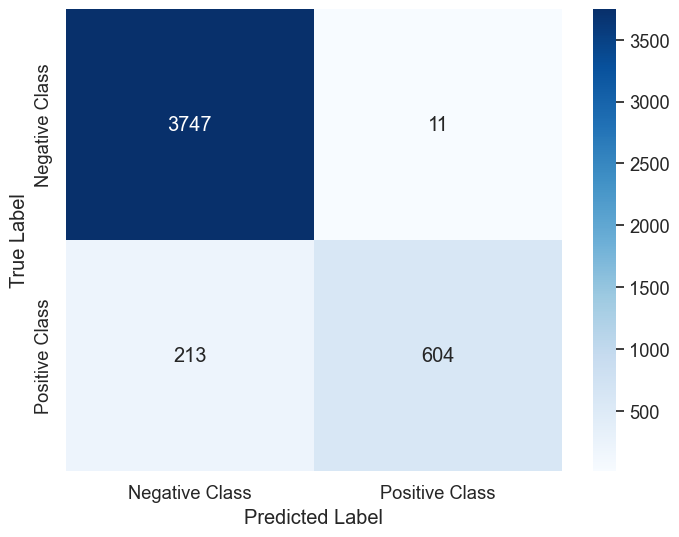

In [13]:
cm = confusion_matrix(y_train, y_pred4)

# Definir rótulos das classes (substitua pelos seus próprios rótulos, se necessário)
class_names = ['Negative Class', 'Positive Class']

# Plotar a matriz de confusão usando Seaborn
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Ajuste o tamanho da fonte

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()